In [1]:
import tensorflow as tf
import keras
import numpy as np

from tensorflow.keras import layers 

# Evaluation library
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

from keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical  ### 
from scikeras.wrappers import KerasClassifier

In [2]:
(x_train,y_train), (x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
# flattening the input
x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test.reshape(x_test.shape[0], 28, 28, 1)

#input shape

input_shape = (28, 28, 1) ### 28 row, 28 col, 1 channel

In [6]:

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
x_train /= 256
x_test /= 256

In [8]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape) ) ## 28-filters (channel depth, filter's shape 3X3
model.add(MaxPooling2D(pool_size=(2,2) ))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu )) ## 128- neurons, activation function
model.add(Dropout(0.2))  ### Remove the unimportant neurons to reduce the overfitting and underfitting
model.add(Dense(10, activation=tf.nn.softmax )) ## 10- no of classes

/opt/anaconda3/envs/venvaiml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile and train the model
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=x_train,y=y_train,epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8851 - loss: 0.3801 - val_accuracy: 0.9756 - val_loss: 0.0809
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9726 - loss: 0.0918 - val_accuracy: 0.9806 - val_loss: 0.0630
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9817 - loss: 0.0596 - val_accuracy: 0.9817 - val_loss: 0.0571
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9846 - loss: 0.0447 - val_accuracy: 0.9833 - val_loss: 0.0515
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9879 - loss: 0.0364 - val_accuracy: 0.9826 - val_loss: 0.0561
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9910 - loss: 0.0266 - val_accuracy: 0.9854 - val_loss: 0.0497
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9923 - loss: 0.0226 - val_accuracy: 0.9851 - val_loss: 0.0522
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9929 - loss: 0.0202 - 

In [10]:
# Test the model using evaluate function, gives the loss and accuracy score...
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9800 - loss: 0.0807


[0.0693853572010994, 0.9828000068664551]

In [11]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [12]:
y_pred[0]

array([4.6501681e-15, 1.9254086e-11, 1.4272094e-14, 2.9985319e-09,
       3.1027058e-15, 3.1119279e-15, 2.8160517e-22, 1.0000000e+00,
       2.7531504e-13, 1.0000527e-09], dtype=float32)

In [13]:
y_predicts = np.argmax(y_pred,axis=1)

In [14]:
y_predicts

array([7, 2, 1, ..., 4, 5, 6])

In [16]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [18]:
con_mat = confusion_matrix(y_test, y_predicts)
con_mat

array([[ 970,    1,    1,    0,    0,    0,    2,    2,    0,    4],
       [   0, 1127,    2,    1,    0,    1,    1,    2,    1,    0],
       [   1,    1, 1002,    7,    1,    0,    1,   14,    3,    2],
       [   0,    0,    1,  996,    0,   12,    0,    1,    0,    0],
       [   1,    0,    0,    0,  956,    0,    4,    1,    3,   17],
       [   0,    0,    0,    2,    0,  888,    2,    0,    0,    0],
       [   3,    2,    0,    1,    3,    6,  939,    0,    4,    0],
       [   1,    0,    5,    0,    1,    0,    0, 1016,    0,    5],
       [   4,    0,    0,    8,    0,    8,    1,    4,  944,    5],
       [   0,    3,    1,    1,    4,    5,    1,    3,    1,  990]])

In [19]:
clf_report = classification_report(y_test,y_predicts)
print (clf_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.97      1.00      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [20]:
print (history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


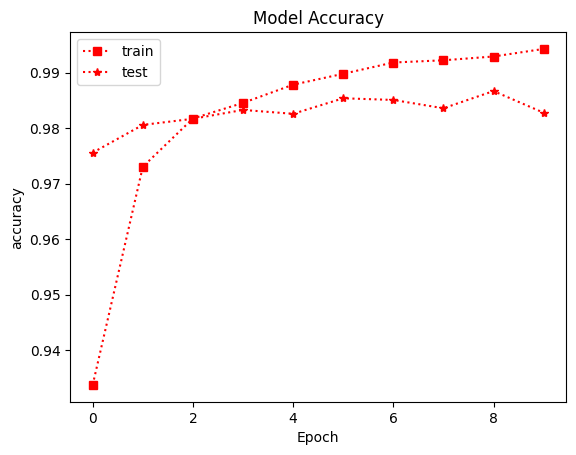

In [21]:
# Summarize history of accuracy


plt.plot(history.history['accuracy'],'s:r')
plt.plot(history.history['val_accuracy'],'*:r')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='best')
plt.show()

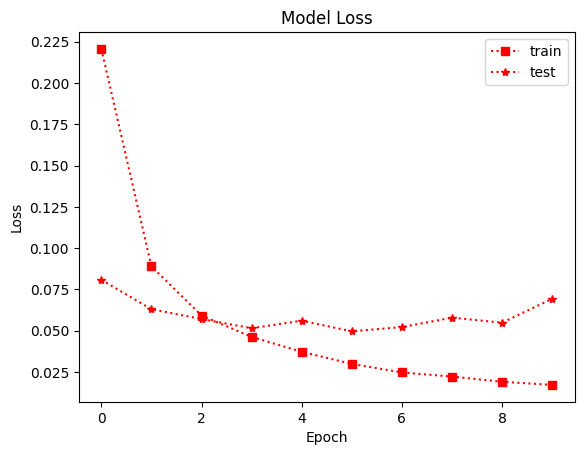

In [22]:
### # Summarize history of  MOdel Loss

plt.plot(history.history['loss'],'s:r')
plt.plot(history.history['val_loss'],'*:r')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='best')
plt.show()